<a href="https://colab.research.google.com/github/abhijeetanand9875/OIBSIP/blob/main/Unemployement_Analysis_With_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#import python libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import calendar
!pip install plotly
import plotly.express as px

In [10]:
# import csv file

abhi= pd.read_csv("/content/Unemployment in India.csv")

# EXPLORING THE DATA

In [11]:
abhi.shape

(768, 7)

In [12]:
abhi.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [8]:
ua.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [14]:
abhi.head().T

,0,1,2,3,4
Region,Andhra Pradesh,Andhra Pradesh,Andhra Pradesh,Andhra Pradesh,Andhra Pradesh
Date,31-05-2019,30-06-2019,31-07-2019,31-08-2019,30-09-2019
Frequency,Monthly,Monthly,Monthly,Monthly,Monthly
Estimated Unemployment Rate (%),3.65,3.05,3.75,3.32,5.17
Estimated Employed,11999139.0,11755881.0,12086707.0,12285693.0,12256762.0
Estimated Labour Participation Rate (%),43.24,42.05,43.5,43.97,44.68
Area,Rural,Rural,Rural,Rural,Rural


In [15]:
#check for null values

pd.isnull(abhi).sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [16]:
#drop null values

abhi.dropna(inplace=True)

In [17]:
abhi.shape

(740, 7)

In [18]:
#describe() returns description of the data

abhi.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


# DATA PREPROCESSING

In [19]:
# Updating Column Names

abhi.columns = abhi.columns.str.strip()  # Remove leading and trailing whitespaces from column names

abhi.rename(columns={
    'Region': 'State',
    'Date': 'Date',
    'Frequency': 'Frequency',
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labor_Participation_Rate',
    'Region.1': 'Region',
    'Longitude': 'Latitude',
    'Latitude': 'Longitude'
}, inplace=True)

print(abhi.columns)

Index(['State', 'Date', 'Frequency', 'Unemployment_Rate', 'Employed',
       'Labor_Participation_Rate', 'Area'],
      dtype='object')


In [20]:
abhi.head()

,State,Date,Frequency,Unemployment_Rate,Employed,Labor_Participation_Rate,Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [21]:
abhi.State.value_counts()

Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: State, dtype: int64

In [22]:
abhi['Date'] = pd.to_datetime(abhi['Date'],dayfirst=True)  # Converting 'Date' column to datetime

# Creating a new column for the month
abhi['Month'] = abhi['Date'].dt.month

print(abhi.head())

            State       Date Frequency  Unemployment_Rate    Employed  \
0  Andhra Pradesh 2019-05-31   Monthly               3.65  11999139.0   
1  Andhra Pradesh 2019-06-30   Monthly               3.05  11755881.0   
2  Andhra Pradesh 2019-07-31   Monthly               3.75  12086707.0   
3  Andhra Pradesh 2019-08-31   Monthly               3.32  12285693.0   
4  Andhra Pradesh 2019-09-30   Monthly               5.17  12256762.0   

   Labor_Participation_Rate   Area  Month  
0                     43.24  Rural      5  
1                     42.05  Rural      6  
2                     43.50  Rural      7  
3                     43.97  Rural      8  
4                     44.68  Rural      9  


# DATA VISUALIZATION

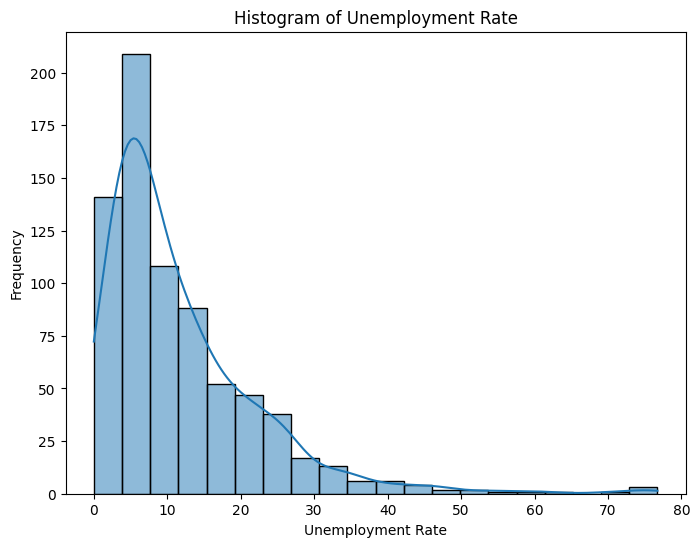

In [23]:
# Histogram of the Unemployment Rate
plt.figure(figsize=(8, 6))
sns.histplot(abhi['Unemployment_Rate'], bins=20, kde=True)
plt.title('Histogram of Unemployment Rate')
plt.xlabel('Unemployment Rate')
plt.ylabel('Frequency')
plt.show()

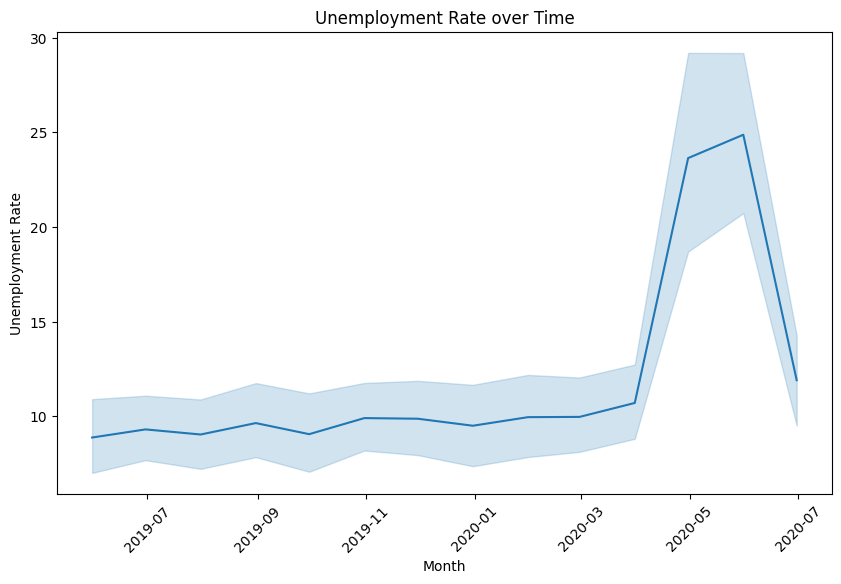

In [24]:
# Line plot of Unemployment Rate over time (Date)
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Unemployment_Rate', data=abhi)
plt.title('Unemployment Rate over Time')
plt.xlabel('Month')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=45)
plt.show()

In [25]:
# Box plot of Unemployment Rate by Region
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Unemployment_Rate', data=abhi)
plt.title('Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=45)
plt.show()

ValueError: ignored

<Figure size 1000x600 with 0 Axes>

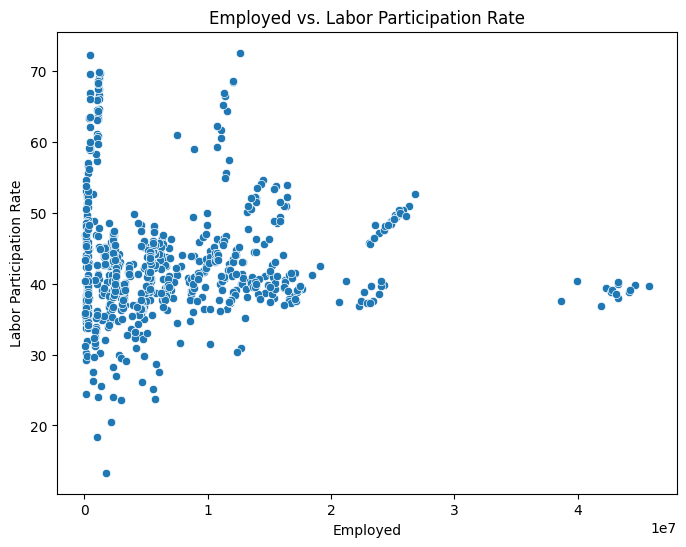

In [26]:
# Scatter plot of Employed vs. Labor Participation Rate
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Employed', y='Labor_Participation_Rate', data=abhi)
plt.title('Employed vs. Labor Participation Rate')
plt.xlabel('Employed')
plt.ylabel('Labor Participation Rate')
plt.show()

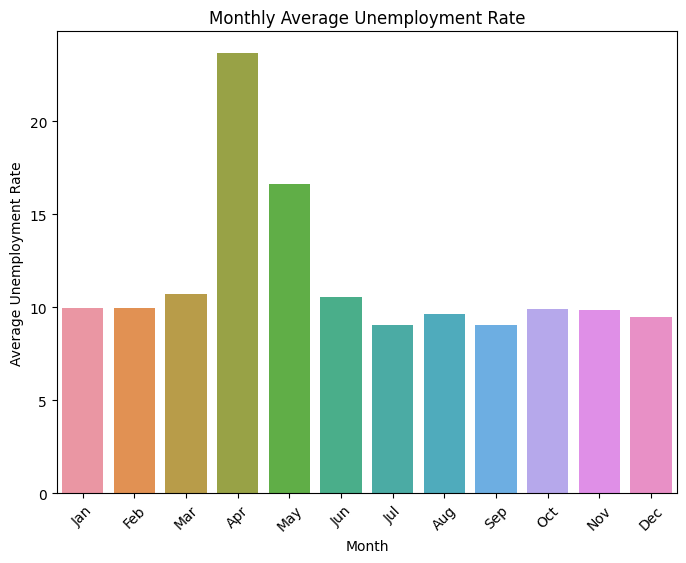

In [27]:
monthly_avg_unemployment = abhi.groupby('Month')['Unemployment_Rate'].mean()
# Plotting the monthly average of Unemployment Rate
plt.figure(figsize=(8, 6))
sns.barplot(x=monthly_avg_unemployment.index, y=monthly_avg_unemployment.values)
plt.title('Monthly Average Unemployment Rate')
plt.xlabel('Month')
plt.ylabel('Average Unemployment Rate')
plt.xticks(np.arange(0, 12), calendar.month_abbr[1:13], rotation=45)
plt.show()

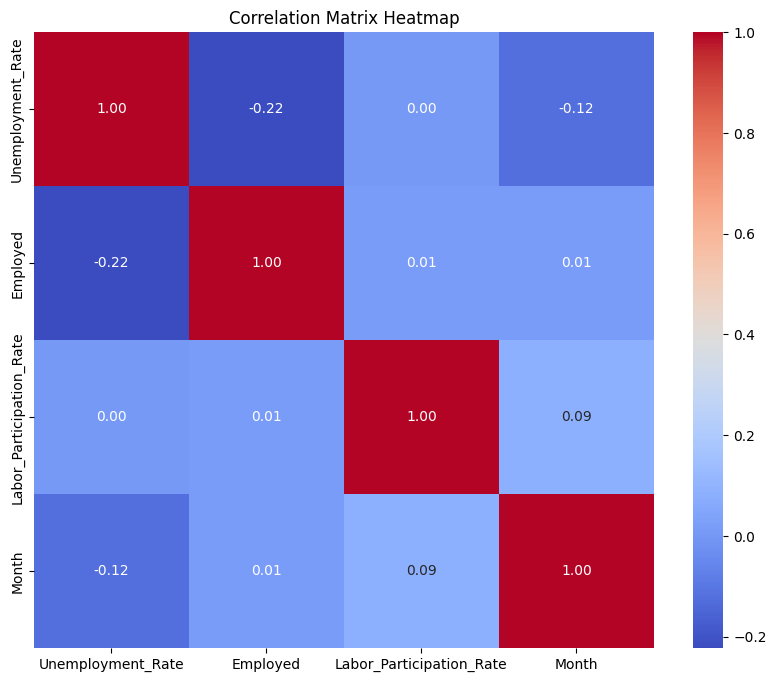

In [28]:
# Exclude non-numeric columns from correlation calculation
numeric_columns = abhi.select_dtypes(include=[np.number])

# Calculate correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

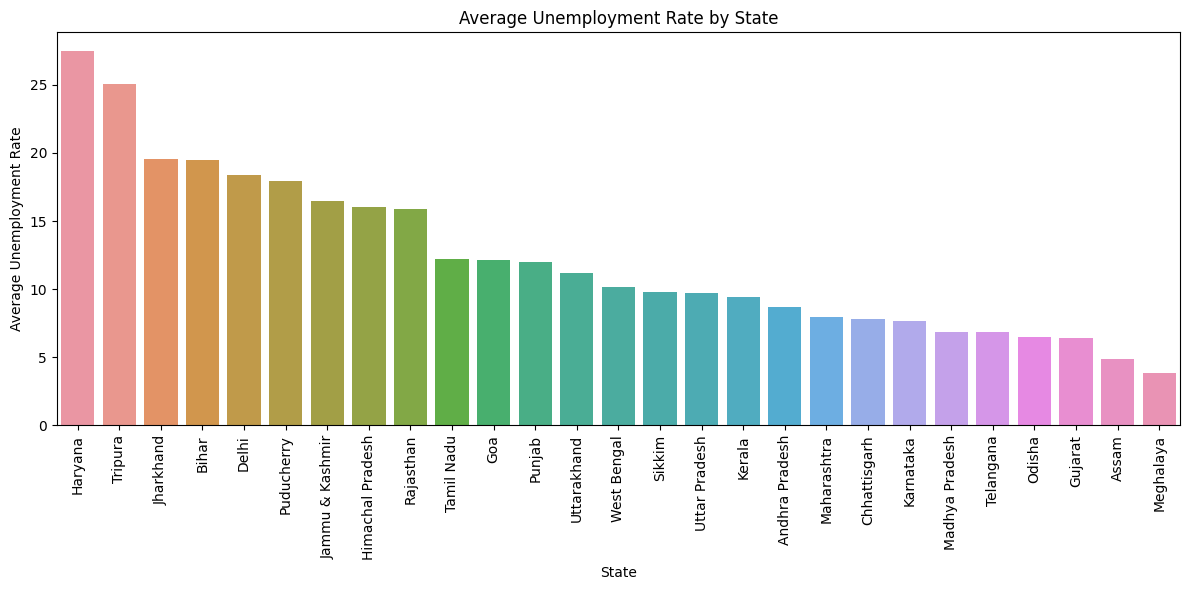

In [ ]:
state_unemployment = ua.groupby('State')['Unemployment_Rate'].mean().reset_index()

# Sort the data in descending order to find the state with the highest unemployment rate
state_unemployment_sorted = state_unemployment.sort_values(by='Unemployment_Rate', ascending=False)

# Plot the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Unemployment_Rate', data=state_unemployment_sorted)
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Average Unemployment Rate')
plt.title('Average Unemployment Rate by State')
plt.tight_layout()
plt.show()

# CONCLUSION

### Based on the EDA and the visualizations of the unemployment rate data, we can draw the following conclusions:

### Urban Areas:
The analysis indicates that most of the high unemployment rates are observed in urban areas. This could be attributed to various factors such as a higher population density, more industries, and a larger labor force competing for limited job opportunities.

### Regional Variation:
The southern region of India shows a higher average unemployment rate compared to other regions. This regional disparity may be influenced by economic and industrial variations across different parts of the country.

### States with Highest Unemployment Rates:
The top five states with the highest average unemployment rates are Haryana, Tripura, Jharkhand, Bihar, and Delhi. These states might be facing specific economic challenges and job market issues, contributing to elevated unemployment rates.